In [1]:
import numpy as np
import jax.random as random
rng = random.PRNGKey(2022)

import matplotlib.pyplot as plt

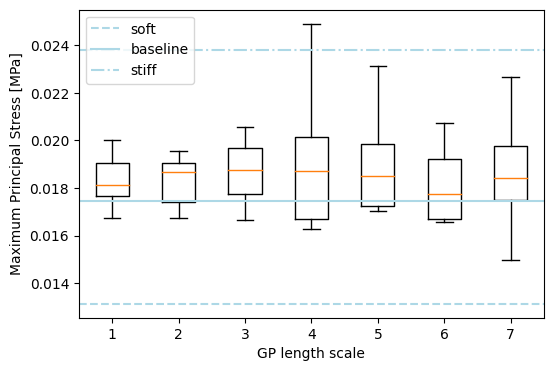

In [3]:
fig, ax = plt.subplots(figsize=(6,4))
lenscales = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
y_ht = []
for lenscale in lenscales:
    yi = []
    for init in range(1,11):
        file = 'fem/PurdueP/PP_fine_filleted_sgmmsr_0.08_lenscale_' + str(lenscale) + '_init_' + str(init) + '.txt'
        data = np.loadtxt(file, skiprows=1)

        sgmxx, sgmyy, sgmxy = data.T

        sgm1 = 0.5*(sgmxx+sgmyy) + np.sqrt((sgmxx-sgmyy)**2/4 + sgmxy**2)
        sgm2 = 0.5*(sgmxx+sgmyy) - np.sqrt((sgmxx-sgmyy)**2/4 + sgmxy**2)

        mps = np.maximum(np.abs(sgm1), np.abs(sgm2))
        yi.append(np.max(mps))
    y_ht.append(yi)
y_ht = np.array(y_ht)
stds = np.std(y_ht,axis=1)
mean = np.mean(y_ht,axis=1)

# ax.errorbar(lenscales, mean, yerr=stds*2, capsize=5.0)
ax.boxplot(y_ht.T)
ax.set(xlabel='GP length scale', ylabel='Maximum Principal Stress [MPa]')
np.savetxt('tikz/fig_PurdueP_data/heterogeneous.csv', y_ht.T*1000, comments="")


# Add the homogeneous outputs
y_hm = []
for style, label in zip(['--', '-', '-.'], ['soft', 'baseline', 'stiff']):
    file = 'fem/PurdueP/PP_fine_filleted_homogeneous_' + label + '.txt'
    data = np.loadtxt(file, skiprows=1)

    sgmxx, sgmyy, sgmxy = data.T

    sgm1 = 0.5*(sgmxx+sgmyy) + np.sqrt((sgmxx-sgmyy)**2/4 + sgmxy**2)
    sgm2 = 0.5*(sgmxx+sgmyy) - np.sqrt((sgmxx-sgmyy)**2/4 + sgmxy**2)

    mps = np.maximum(np.abs(sgm1), np.abs(sgm2))
    ax.axhline(np.max(mps), xmin=0, xmax=1.0, linestyle=style, color='lightblue', label=label)
    y_hm.append(np.max(mps))
ax.legend()

x = np.array([0, 8])
ys = np.vstack([y_hm,y_hm])
data = np.hstack([x[:,None],ys*1000])

np.savetxt('tikz/fig_PurdueP_data/homogeneous.csv', data, header="x y_soft y_med y_stiff", comments="")

In [4]:
print('where the maximum and the minimum of 0.05, 0.3 and 0.6 occur')
for i in [0, 3, 6]:
    yi = y_ht[i]
    print(np.argmin(yi)+1, np.argmax(yi)+1)

where the maximum and the minimum of 0.05, 0.3 and 0.6 occur
5 7
10 3
10 1


### MPS for upper right corner (instead of the Maximum MPS over the domain) (not used)

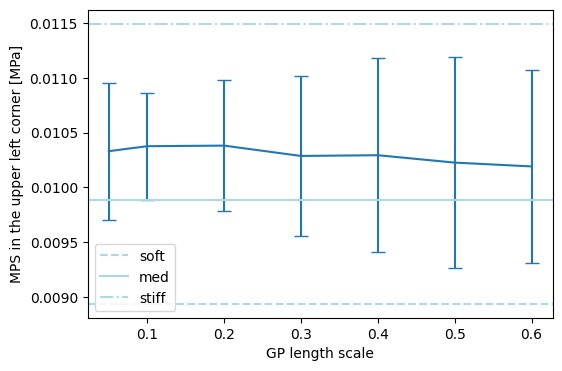

In [4]:
fig, ax = plt.subplots(figsize=(6,4))
lenscales = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
y = []
for lenscale in lenscales:
    yi = []
    for init in range(1,21):
        file = 'fem/PurdueP/PP_fine_filleted_sgmmsr_0.08_lenscale_' + str(lenscale) + '_init_' + str(init) + '.txt'
        data = np.loadtxt(file, skiprows=1)

        sgmxx, sgmyy, sgmxy = data.T

        sgm1 = 0.5*(sgmxx+sgmyy) + np.sqrt((sgmxx-sgmyy)**2/4 + sgmxy**2)
        sgm2 = 0.5*(sgmxx+sgmyy) - np.sqrt((sgmxx-sgmyy)**2/4 + sgmxy**2)

        mps = np.maximum(np.abs(sgm1), np.abs(sgm2))
        yi.append(mps[1107])
    # ax.plot(np.ones_like(yi)*lenscale, np.array(yi)*1000, '.')
    y.append(yi)
y = np.array(y)
stds = np.std(y,axis=1)
y = np.mean(y,axis=1)

ax.errorbar(lenscales, y, yerr=2*stds, capsize=5.0)
ax.set(xlabel='GP length scale', ylabel='MPS in the upper left corner [MPa]')


# Add the homogeneous outputs
for style, label in zip(['--', '-', '-.'], ['soft', 'med', 'stiff']):
    file = 'fem/PurdueP/PP_fine_filleted_homogeneous_' + label + '.txt'
    data = np.loadtxt(file, skiprows=1)

    sgmxx, sgmyy, sgmxy = data.T

    sgm1 = 0.5*(sgmxx+sgmyy) + np.sqrt((sgmxx-sgmyy)**2/4 + sgmxy**2)
    sgm2 = 0.5*(sgmxx+sgmyy) - np.sqrt((sgmxx-sgmyy)**2/4 + sgmxy**2)

    mps = np.maximum(np.abs(sgm1), np.abs(sgm2))
    ax.axhline(mps[1107], xmin=0, xmax=1.0, linestyle=style, color='lightblue', label=label)
ax.legend()